In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [279]:
dfOrders=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/orders.csv')
dfDept=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/departments.csv')
dfOrdersPrior=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/order_products__prior.csv')
dfAisles=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/aisles.csv')
dfProd=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/products.csv')
dfOrdersTrain=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/order_products__train.csv')

In [280]:
dfOrdersTrain.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [281]:
dfOrdersPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [282]:
dfOrders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [283]:
dfDept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [284]:
dfAisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [285]:
dfProd.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# How many products are there?

In [286]:
dfProd['product_id'].unique()


array([    1,     2,     3, ..., 49686, 49687, 49688])

# Build an array that contains all the products, aisles and departments...

In [287]:
dfShelves = dfProd.merge(dfAisles).sort_values(by='product_name')
dfShelves = dfShelves.merge(dfDept).sort_values(by='product_name')
dfShelves.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,25773,#2 Coffee Filters,26,7,coffee,beverages
1,2158,#2 Cone White Coffee Filters,26,7,coffee,beverages
4365,26685,#2 Mechanical Pencils,87,17,more household,household
2,26381,#4 Natural Brown Coffee Filters,26,7,coffee,beverages
7450,20604,& Go! Hazelnut Spread + Pretzel Sticks,88,13,spreads,pantry


# Weekly Shopping Profile

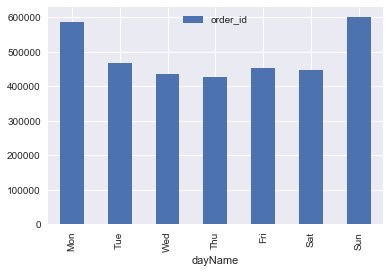

In [288]:
days = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'} #dictionary of numeric day:Alpha day
week = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']

a = dfOrders #set new df equal to orders df
a['dayName']=a['order_dow'].apply(lambda x: days[x]) #create new column 'dayName' compare' order_dow' to dictionary
a = a.groupby(['dayName'])[['order_id']].count().reindex(week).plot.bar() #group the orders by dayName


# Hourly Shopping Profile

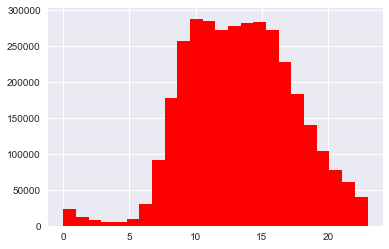

In [289]:
dfOrders['order_hour_of_day'].hist(bins=24,color='red')

In [290]:
dfOrders['order_hour_of_day'].describe()

count    3.421083e+06
mean     1.345202e+01
std      4.226088e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

# Days Since Prior Order

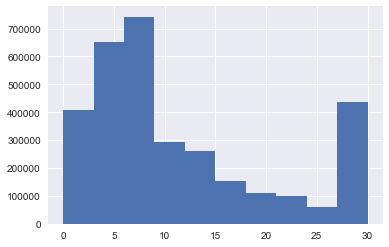

In [291]:
dfOrders['days_since_prior_order'].hist()
#what is going on with the spike?

In [292]:
dfOrders['days_since_prior_order'].describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

# The Qty of Purchases per Department

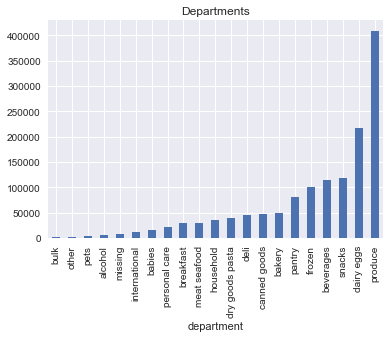

In [293]:
dfFun=dfOrdersTrain.merge(dfShelves) #combine the prior orders & shelf contents
a=dfFun.groupby(['department']).size().sort_values() #groupby department
a.plot(kind='bar',title='Departments')
#shows the most popular departments

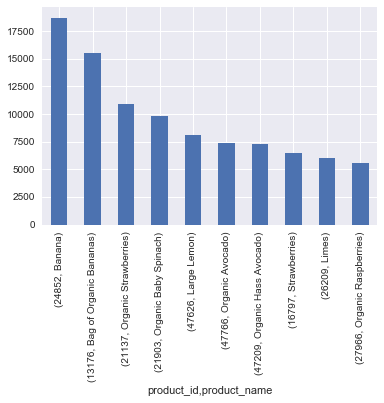

In [294]:
b=dfFun.groupby(['product_id','product_name']).size().sort_values(ascending=False)
b.head(10).plot.bar()

The most commonly ordered product is the BANANA

# Department by Volume of Products

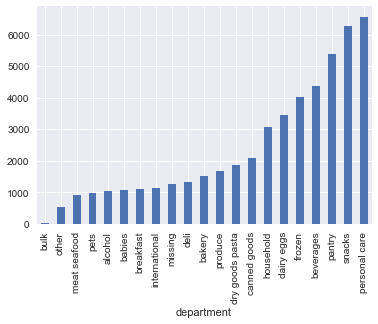

In [295]:
ProductVolume= dfShelves.groupby(['department']).size().sort_values()
ProductVolume.plot(kind='bar')

# How often are products reordered?

In [296]:
c=dfOrdersTrain.groupby(['product_id'],as_index=False)['reordered'].agg('mean')
c.rename(columns={'product_id':'product_id','reordered':'prop_reordered'},inplace=True)

d=c.merge(dfProd,on='product_id')
d[d['prop_reordered']!=1].sort_values(by='prop_reordered',ascending=False).head(10)


,product_id,prop_reordered,product_name,aisle_id,department_id
20426,25926,0.964286,Natural Orange Flavor Sparkling Mineral Water,115,7
11008,13996,0.954545,Giant Peach,94,7
36197,45968,0.950000,Naked Meat Free Chik'n Cutlets,42,1
19314,24508,0.950000,Classic Ocean Whitefish & Tuna Feast Cat Food,41,8
4479,5663,0.947368,Chocolate Energy Supplement,47,11
19349,24555,0.944444,Mocha Cappuccino,31,7
2948,3744,0.944444,Dark Italian Roast Ground Coffee,26,7
13765,17469,0.941176,Lo-Carb Energy Drink,64,7
13021,16540,0.941176,Chicken Ceasar Wrap,1,20
22821,28987,0.941176,Vanilla Bottles,92,18


In [297]:
#how do i eliminate items that were only bought a few times from the above aggregate?

# How Many Prior Orders are there?

In [ ]:
dfOrders.eval_set.value_counts()


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

# How many Items do people usually buy?

In [ ]:
dfQtyBought = dfOrdersPrior.groupby(['order_id']).last()
dfQtyBought.reset_index()
dfQty = dfQtyBought['add_to_cart_order']
dfQty.plot.hist(bins=60)

In [ ]:
dfQty.describe()

The average purchase is 10 items